In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

### Data Preprocessing

In [19]:
#importing the dataset
newdf1=pd.read_csv(r'C:\Users\arush\weatheraus.csv') #please update the file location
newdf1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48,ENE,...,13,1006.3,1004.4,2,5,26.6,33.4,No,0.0,No
1,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37,SSE,...,8,1012.9,1012.1,1,1,20.3,27.0,No,0.0,No
2,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46,NNE,...,22,1012.3,1009.2,1,6,28.7,34.9,No,0.0,No
3,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31,WNW,...,22,1012.7,1009.1,1,5,29.1,35.6,No,0.0,No
4,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35,NW,...,15,1010.7,1007.4,1,6,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6/20/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35,SE,...,32,1013.9,1010.5,0,1,24.5,32.3,No,0.0,No
56416,6/21/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37,SE,...,28,1014.6,1011.2,7,0,24.8,32.0,No,0.0,No
56417,6/22/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33,E,...,23,1015.3,1011.8,0,0,24.8,32.1,No,0.0,No
56418,6/23/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26,SE,...,58,1014.9,1010.7,1,1,24.8,29.2,No,0.0,No


In [20]:
#checking for NA
newdf1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

#### We can see that there are no null values present in the dataset.

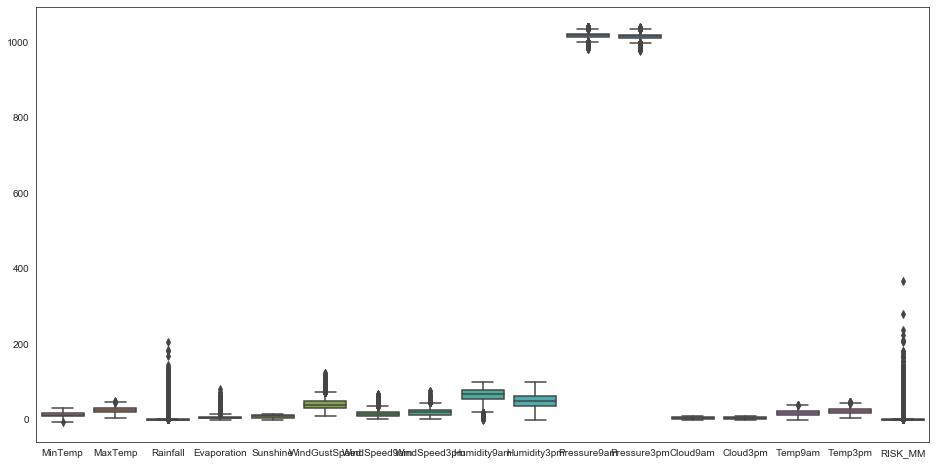

In [21]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(data = newdf1 )

In [22]:
#From the given dataset description, it is given that we should remove RISK_MM column, so it will be dropped as follow:
newdf1.drop(['RISK_MM'], axis=1, inplace=True)


In [23]:
#Exploring categorical values:
categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [24]:
#View categorical values:
newdf1[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1/1/2009,Cobar,SSW,ENE,SW,No,No
1,1/2/2009,Cobar,S,SSE,SSE,No,No
2,1/4/2009,Cobar,NNE,NNE,NNW,No,No
3,1/5/2009,Cobar,WNW,WNW,WSW,No,No
4,1/6/2009,Cobar,WNW,NW,WNW,No,No


#### summary of categorical variables:
There is a date variable. It is denoted by Date column.

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

In [25]:
#Frequency count of categorical variables:
for var in categorical: 
    
    print(newdf1[var].value_counts())

1/18/2009     25
2/25/2009     25
11/16/2010    25
7/25/2009     25
3/3/2010      25
              ..
1/26/2008      1
12/21/2007     1
2/6/2008       1
4/28/2008      1
2/20/2008      1
Name: Date, Length: 3416, dtype: int64
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791

In [26]:
#check for cardinality 
for var in categorical:
    
    print(var, ' contains ', len(newdf1[var].unique()), ' labels')

Date  contains  3416  labels
Location  contains  26  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [27]:
#feature engineering of date variable

newdf1['Date'].dtypes

dtype('O')

In [28]:
# parse the dates, currently coded as strings, into datetime format

newdf1['Date'] = pd.to_datetime(newdf1['Date'])

In [29]:
# extract year from date

newdf1['Year'] = newdf1['Date'].dt.year

newdf1['Year'].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: Year, dtype: int64

In [30]:
# extract month from date

newdf1['Month'] = newdf1['Date'].dt.month

newdf1['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [31]:
# extract day from date

newdf1['Day'] = newdf1['Date'].dt.day

newdf1['Day'].head()

0    1
1    2
2    4
3    5
4    6
Name: Day, dtype: int64

In [32]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
Date             56420 non-null datetime64[ns]
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null int64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null int64
WindSpeed3pm     56420 non-null int64
Humidity9am      56420 non-null int64
Humidity3pm      56420 non-null int64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null int64
Cloud3pm         56420 non-null int64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     56420 

In [33]:
 #drop the original Date variable

newdf1.drop('Date', axis=1, inplace = True)

In [34]:
#exploring other categorical variables one by one:

categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [35]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method
newdf2=pd.get_dummies(newdf1)
      

In [36]:
#Dropping extra dummy variables:
newdf2=newdf2.drop(['Location_AliceSprings','WindGustDir_E','WindDir9am_E','WindDir3pm_E','RainToday_No','RainTomorrow_No'], axis=1)

In [37]:
newdf2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.00000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,...,0.072829,0.073609,0.059057,0.061769,0.07111,0.069514,0.056717,0.068345,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,...,0.259858,0.261135,0.235734,0.240737,0.25701,0.254329,0.231304,0.252338,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 91 columns):
MinTemp                      56420 non-null float64
MaxTemp                      56420 non-null float64
Rainfall                     56420 non-null float64
Evaporation                  56420 non-null float64
Sunshine                     56420 non-null float64
WindGustSpeed                56420 non-null int64
WindSpeed9am                 56420 non-null int64
WindSpeed3pm                 56420 non-null int64
Humidity9am                  56420 non-null int64
Humidity3pm                  56420 non-null int64
Pressure9am                  56420 non-null float64
Pressure3pm                  56420 non-null float64
Cloud9am                     56420 non-null int64
Cloud3pm                     56420 non-null int64
Temp9am                      56420 non-null float64
Temp3pm                      56420 non-null float64
Year                         56420 non-null int64
Month                  

In [39]:
x2 = newdf2.iloc[:,1:90].values 

y2 = newdf2.iloc[:,90].values

In [40]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x2, y2 , test_size = 0.3, random_state = 0)

In [41]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

### Support Vector Machine

In [150]:
#linear SVM
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X1_train, y1_train)

#Applying K- fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svclassifier, X= X1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_linear*100,end='\n')
print('standard deviation after cross validation:',std_svm_linear*100,end='\n')

#Predict SVM
y_predlinear1 = svclassifier.predict(X1_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_linear = confusion_matrix(y1_test, y_predlinear1)
report=classification_report(y1_test,y_predlinear1)
accu_svm_linear=accuracy_score(y1_test,y_predlinear1)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_linear,end='\n')
print('The classification report accuracy',report,end='\n')
print('The accuracy score',accu_svm_linear*100,end='\n')


Mean of accuracies after cross validation: 85.59528147701398
standard deviation after cross validation: 0.15398489253329253
The confusion matrix accuracy [[12525   633]
 [ 1749  2019]]
The classification report accuracy               precision    recall  f1-score   support

           0       0.88      0.95      0.91     13158
           1       0.76      0.54      0.63      3768

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926

The accuracy score 85.9269762495569


In [189]:
#RBF SVM
from sklearn.svm import SVC
svclassifier_rbf1=SVC(kernel='rbf',gamma='auto')
svclassifier_rbf1.fit(X1_train, y1_train)

#Applying K- fold cross validation
from sklearn.model_selection import cross_val_score
accuracies_rbf1 = cross_val_score(estimator = svclassifier_rbf1, X= X1_train, y = y1_train, cv = 5)
mean_svm_rbf1=accuracies_rbf1.mean()
std_svm_rbf1=accuracies_rbf1.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_rbf1*100,end='\n')
print('standard deviation after cross validation:',std_svm_rbf1*100,end='\n')

#Predict SVM
y_predrbf1 = svclassifier_rbf1.predict(X1_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_rbf1 = confusion_matrix(y1_test, y_predrbf1)
report_rbf1=classification_report(y1_test,y_predrbf1)
accu_svm_rbf1=accuracy_score(y1_test,y_predrbf1)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_rbf1,end='\n')
print('The classification report accuracy',report_rbf1,end='\n')
print('The accuracy score',accu_svm_rbf1*100,end='\n')


Mean of accuracies after cross validation: 86.2384159266244
standard deviation after cross validation: 0.18930702434749605
The confusion matrix accuracy [[12560   598]
 [ 1697  2071]]
The classification report accuracy               precision    recall  f1-score   support

           0       0.88      0.95      0.92     13158
           1       0.78      0.55      0.64      3768

    accuracy                           0.86     16926
   macro avg       0.83      0.75      0.78     16926
weighted avg       0.86      0.86      0.86     16926

The accuracy score 86.44097837646225


In [153]:
#Poly SVM
from sklearn.svm import SVC
svclassifier_poly1=SVC(kernel='poly',gamma='auto')
svclassifier_poly1.fit(X1_train, y1_train)

#Applying K- fold cross validation
from sklearn.model_selection import cross_val_score
accuracies_poly1 = cross_val_score(estimator = svclassifier_poly1, X= X1_train, y = y1_train, cv = 5)
mean_svm_poly1=accuracies_poly1.mean()
std_svm_poly1=accuracies_poly1.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_poly1*100,end='\n')
print('standard deviation after cross validation:',std_svm_poly1*100,end='\n')

#Predict SVM
y_predpoly1 = svclassifier_poly1.predict(X1_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_poly1 = confusion_matrix(y1_test, y_predpoly1)
report_poly1=classification_report(y1_test,y_predpoly1)
accu_svm_poly1=accuracy_score(y1_test,y_predpoly1)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_poly1,end='\n')
print('The classification report accuracy',report_poly1,end='\n')
print('The accuracy score',accu_svm_poly1*100,end='\n')


Mean of accuracies after cross validation: 85.54716514532309
standard deviation after cross validation: 0.15600076168908364
The confusion matrix accuracy [[12566   592]
 [ 1854  1914]]
The classification report accuracy               precision    recall  f1-score   support

           0       0.87      0.96      0.91     13158
           1       0.76      0.51      0.61      3768

    accuracy                           0.86     16926
   macro avg       0.82      0.73      0.76     16926
weighted avg       0.85      0.86      0.84     16926

The accuracy score 85.54885974240814


### Learning curve for RBF Model

<function matplotlib.pyplot.show(*args, **kw)>

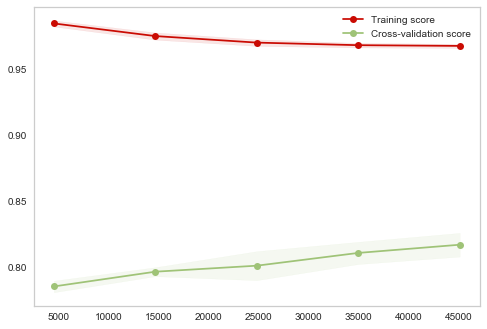

In [171]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svclassifier_rbf1, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

### Decision Trees

In [155]:
#Fitting Decision Tree Classification to the Training set with gini as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini1 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_DF_gini1.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_gini1 = cross_val_score(estimator = classifier_DF_gini1, X = X1_train, y = y1_train, cv = 10,n_jobs=-1)
mean_DF_gini1=accuracies_gini1.mean()
std_DF_gini1=accuracies_gini1.std()


#after using cross validation with 10 folds
print(mean_DF_gini1*100,end='\n')
print(std_DF_gini1*100,end='\n')


# Predicting the Test set results
y_pred_gini1 = classifier_DF_gini1.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_DF_gini1 = confusion_matrix(y1_test, y_pred_gini1)
accu_DF_gini1=accuracy_score(y1_test,y_pred_gini1)
report_gini1=classification_report(y1_test,y_pred_gini1)

#printing the confusin matrix result
print(cm_DF_gini1,end='\n')
print(accu_DF_gini1*100,end='\n')
print(report_gini1,end='\n')

79.81713978188235
0.44249292767282966
[[11450  1708]
 [ 1647  2121]]
80.17842372681082
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     13158
           1       0.55      0.56      0.56      3768

    accuracy                           0.80     16926
   macro avg       0.71      0.72      0.72     16926
weighted avg       0.80      0.80      0.80     16926



### Learning curve for Decision Tree

<function matplotlib.pyplot.show(*args, **kw)>

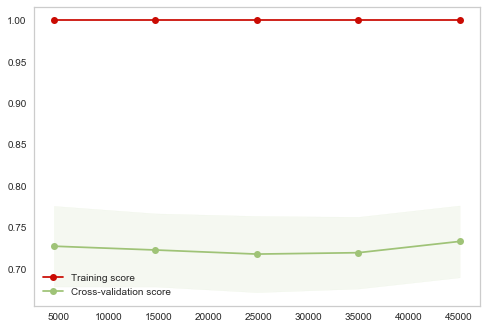

In [172]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_gini1, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [173]:
#playing around with the pruning to get the best decision tree
#performing grid search to find the best type of SVM and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search, Kernel SVM to the Training set

from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini1 = DecisionTreeClassifier(criterion='gini',random_state = 0)
classifier_DF_gini1.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]},
              {'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = classifier_DF_gini1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8462804476629362
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}


### Boosting

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_boost_new1 = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier_boost_new1.fit(X1_train, y1_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_new_boost1 = cross_val_score(estimator = classifier_boost_new1, X = X1_train, y = y1_train, cv = 5,n_jobs=-1)
mean_DF_gini_new_boost1=accuracies_new_boost1.mean()
std_DF_gini_new_boost1=accuracies_new_boost1.std()

#after using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_gini_new_boost1*100,end='\n')
print('standard deviation after cross validation:',mean_DF_gini_new_boost1*100,end='\n')

# Predicting the Test set results
y_pred_boost_new1 = classifier_boost_new1.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm_GBC_boost_new1 = confusion_matrix(y1_test, y_pred_boost_new1)
accu_GBC_boost_new1=accuracy_score(y1_test,y_pred_boost_new1)
report_boost_new_1=classification_report(y1_test,y_pred_boost_new1)

# After using confusion matrix
print('The confusion matrix accuracy',cm_GBC_boost_new1,end='\n')
print('The accuracy score',accu_GBC_boost_new1*100,end='\n')
print('The classification report accuracy',report_boost_new_1,end='\n')



Mean of accuracies after cross validation: 83.19997585367376
standard deviation after cross validation: 83.19997585367376
The confusion matrix accuracy [[12970   188]
 [ 2646  1122]]
The accuracy score 83.25652841781874
The classification report accuracy               precision    recall  f1-score   support

           0       0.83      0.99      0.90     13158
           1       0.86      0.30      0.44      3768

    accuracy                           0.83     16926
   macro avg       0.84      0.64      0.67     16926
weighted avg       0.84      0.83      0.80     16926



In [175]:
from sklearn.ensemble import AdaBoostClassifier
classifier_boost_new2 = AdaBoostClassifier(random_state=1)
classifier_boost_new2.fit(X1_train, y1_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_new_boost2 = cross_val_score(estimator = classifier_boost_new2, X = X1_train, y = y1_train, cv = 10,n_jobs=-1)
mean_DF_gini_new_boost2=accuracies_new_boost2.mean()
std_DF_gini_new_boost2=accuracies_new_boost2.std()

#After using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_gini_new_boost2*100,end='\n')
print('standard deviation after cross validation:',std_DF_gini_new_boost2*100,end='\n')

# Predicting the Test set results
y_pred_boost_new2 = classifier_boost_new2.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm_GBC_boost_new2 = confusion_matrix(y1_test, y_pred_boost_new2)
accu_GBC_boost_new2=accuracy_score(y1_test,y_pred_boost_new2)
report_boost_new_2=classification_report(y_test,y_pred_boost_new2)


#After running the confusion matrix
print('The confusion matrix accuracy',cm_GBC_boost_new2,end='\n')
print('The accuracy score',accu_GBC_boost_new2*100,end='\n')
print('The classification report accuracy',report,end='\n')



Mean of accuracies after cross validation: 85.06606171669043
standard deviation after cross validation: 0.48362403546504135
The confusion matrix accuracy [[12414   744]
 [ 1727  2041]]
The accuracy score 85.40115798180314
The classification report accuracy               precision    recall  f1-score   support

           0       0.88      0.95      0.91     13158
           1       0.76      0.54      0.63      3768

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



### Learning curve for Boosting

<function matplotlib.pyplot.show(*args, **kw)>

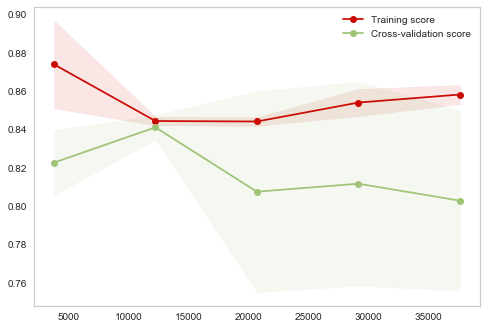

In [176]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_boost_new2, x2, y2,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

### Pruning for Best Boosting Tree

In [45]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(X1_train, y1_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [500,1000,2000,5000]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8569402947283131
{'n_estimators': 500}


### Dataset 2

In [3]:
# Importing the dataset
df1 = pd.read_csv('sgemm_product.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [4]:
#checking for NA
df1.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [5]:
#Average runtime calculations
df1['average_runtime']=df1[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
MWG                241600 non-null int64
NWG                241600 non-null int64
KWG                241600 non-null int64
MDIMC              241600 non-null int64
NDIMC              241600 non-null int64
MDIMA              241600 non-null int64
NDIMB              241600 non-null int64
KWI                241600 non-null int64
VWM                241600 non-null int64
VWN                241600 non-null int64
STRM               241600 non-null int64
STRN               241600 non-null int64
SA                 241600 non-null int64
SB                 241600 non-null int64
Run1 (ms)          241600 non-null float64
Run2 (ms)          241600 non-null float64
Run3 (ms)          241600 non-null float64
Run4 (ms)          241600 non-null float64
average_runtime    241600 non-null float64
dtypes: float64(5), int64(14)
memory usage: 35.0 MB


In [6]:
df1=df1.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


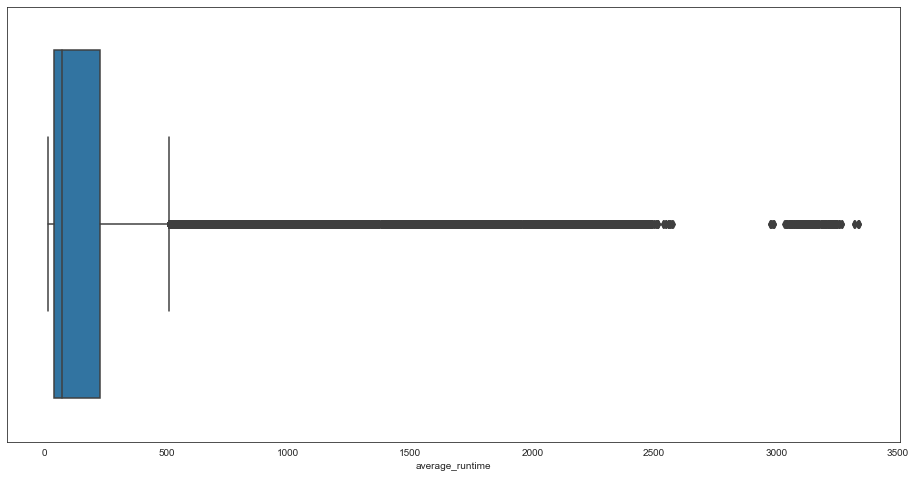

In [7]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x='average_runtime', data = df1 )

In [8]:
#outlier removal
Q1=df1['average_runtime'].quantile(0.25)
Q3=df1['average_runtime'].quantile(0.75)
IQR = Q3 - Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [9]:
df2 = df1[(df1.average_runtime>LL) & (df1.average_runtime<UL)]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


In [10]:
#converting average_runtime into 1 and 0 form for sv

mean = df2['average_runtime'].mean()
df2.loc[df2['average_runtime'] <= mean, 'average_runtime'] = 0
df2.loc[df2['average_runtime'] > mean, 'average_runtime'] = 1

C:\Users\arush\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
x1 = df2.iloc[:,1:14].values 

y1 = df2.iloc[:,14].values

In [12]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
#fitting svm to the training set:(linear)
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_linear = cross_val_score(estimator = svclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_linear=accuracies_linear.mean()
std_svm_linear=accuracies_linear.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_linear*100,end='\n')
print('standard deviation after cross validation:',std_svm_linear*100,end='\n')

# Predicting the Test set results
y_pred = svclassifier.predict(X_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_linear = confusion_matrix(y_test, y_pred)
report=classification_report(y_test,y_pred)
accu_svm_linear=accuracy_score(y_test,y_pred)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_linear,end='\n')
print('The classification report accuracy',report,end='\n')
print('The accuracy score',accu_svm_linear*100,end='\n')

Mean of accuracies after cross validation: 75.70669625400848
standard deviation after cross validation: 0.19751958228035094
The confusion matrix accuracy [[38383  4801]
 [10869 10397]]
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83     43184
         1.0       0.68      0.49      0.57     21266

    accuracy                           0.76     64450
   macro avg       0.73      0.69      0.70     64450
weighted avg       0.75      0.76      0.74     64450

The accuracy score 75.6865787432118


In [190]:
#fitting svm to the training set:(RBF)
from sklearn.svm import SVC
svclassifier_rbf=SVC(kernel='rbf',gamma='auto')
svclassifier_rbf.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rbf = cross_val_score(estimator = svclassifier_rbf, X = X_train, y = y_train, cv = 5)
mean_svm_rbf=accuracies_rbf.mean()
std_svm_rbf=accuracies_rbf.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_rbf*100,end='\n')
print('standard deviation after cross validation:',std_svm_rbf*100,end='\n')

# Predicting the Test set results
y_predrbf = svclassifier_rbf.predict(X_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_rbf = confusion_matrix(y_test, y_predrbf)
report_rbf=classification_report(y_test,y_predrbf)
accu_svm_rbf=accuracy_score(y_test,y_predrbf)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_rbf,end='\n')
print('The classification report accuracy',report_rbf,end='\n')
print('The accuracy score',accu_svm_rbf*100,end='\n')

Mean of accuracies after cross validation: 78.55342600001222
standard deviation after cross validation: 0.16445658285127757
The confusion matrix accuracy [[40414  2770]
 [10937 10329]]
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86     43184
         1.0       0.79      0.49      0.60     21266

    accuracy                           0.79     64450
   macro avg       0.79      0.71      0.73     64450
weighted avg       0.79      0.79      0.77     64450

The accuracy score 78.7323506594259


In [191]:
# Fitting SVM to the Training set:(poly)
from sklearn.svm import SVC
svclassifier_poly=SVC(kernel='poly')
svclassifier_poly.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_poly = cross_val_score(estimator = svclassifier_poly, X = X_train, y = y_train, cv = 5)
mean_svm_poly=accuracies_poly.mean()
std_svm_poly=accuracies_poly.std()

#accuracies after cross validations:
print('Mean of accuracies after cross validation:',mean_svm_poly*100,end='\n')
print('standard deviation after cross validation:',std_svm_poly*100,end='\n')

# Predicting the Test set results
y_predpoly = svclassifier_poly.predict(X_test)

#predicting accuracy through classification report,confusion matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_poly = confusion_matrix(y_test, y_predpoly)
report_poly=classification_report(y_test,y_predpoly)
accu_svm_poly=accuracy_score(y_test,y_predpoly)

#printing accuracy through confusion matrix, classification score and accuracy score:
print('The confusion matrix accuracy',cm_svm_poly,end='\n')
print('The classification report accuracy',report_poly,end='\n')
print('The accuracy score',accu_svm_poly*100,end='\n')

C:\Users\arush\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arush\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arush\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arush\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Mean of accuracies after cross validation: 77.16430583411518
standard deviation after cross validation: 0.17719837708356995
The confusion matrix accuracy [[40007  3177]
 [11410  9856]]
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     43184
         1.0       0.76      0.46      0.57     21266

    accuracy                           0.77     64450
   macro avg       0.77      0.69      0.71     64450
weighted avg       0.77      0.77      0.76     64450

The accuracy score 77.36695112490303


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
  

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



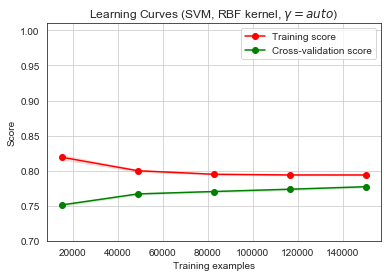

In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

title = r"Learning Curves (SVM, RBF kernel, $\gamma=auto$)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = SVC(kernel = 'rbf', random_state = 0,gamma='auto')
plot_learning_curve(estimator, title, x1, y1, (0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [198]:
#Fitting Decision Tree Classification to the Training set with gini as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_DF_gini.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_gini = cross_val_score(estimator = classifier_DF_gini, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies_gini.mean()
std_DF_gini=accuracies_gini.std()


#after using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_gini*100,end='\n')
print('standard deviation of accuracies after cross validation:',std_DF_gini*100,end='\n')


# Predicting the Test set results
y_pred_gini = classifier_DF_gini.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_DF_gini = confusion_matrix(y_test, y_pred_gini)
accu_DF_gini=accuracy_score(y_test,y_pred_gini)
report_gini=classification_report(y_test,y_pred_gini)

#printing the confusin matrix result
print('The confusion matrix accuracy',cm_DF_gini,end='\n')
print('The accuracy score',accu_DF_gini*100,end='\n')
print('The classification report accuracy',report_gini,end='\n') 




Mean of accuracies after cross validation: 68.5330114482414
standard deviation of accuracies after cross validation: 0.3123655569190256
The confusion matrix accuracy [[35649  7535]
 [12894  8372]]
The accuracy score 68.30256012412723
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.73      0.83      0.78     43184
         1.0       0.53      0.39      0.45     21266

    accuracy                           0.68     64450
   macro avg       0.63      0.61      0.61     64450
weighted avg       0.67      0.68      0.67     64450



In [16]:
#Fitting Decision Tree Classification to the Training set with entropy as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DF_entropy.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_entropy = cross_val_score(estimator = classifier_DF_entropy, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_entropy=accuracies_entropy.mean()
std_DF_entropy=accuracies_entropy.std()


#after using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_entropy*100,end='\n')
print('standard deviation of accuracies after cross validation:',std_DF_entropy*100,end='\n')


# Predicting the Test set results
y_pred_entropy = classifier_DF_entropy.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_DF_entropy = confusion_matrix(y_test, y_pred_entropy)
accu_DF_entropy=accuracy_score(y_test,y_pred_entropy)
report_entropy=classification_report(y_test,y_pred_entropy)

#printing the confusin matrix result
print('The confusion matrix accuracy',cm_DF_entropy,end='\n')
print('The accuracy score',accu_DF_entropy*100,end='\n')
print('The classification report accuracy',report_entropy,end='\n') 


Mean of accuracies after cross validation: 68.54631086806523
standard deviation of accuracies after cross validation: 0.2849411455154611
The confusion matrix accuracy [[35655  7529]
 [12906  8360]]
The accuracy score 68.2932505818464
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.73      0.83      0.78     43184
         1.0       0.53      0.39      0.45     21266

    accuracy                           0.68     64450
   macro avg       0.63      0.61      0.61     64450
weighted avg       0.67      0.68      0.67     64450



<function matplotlib.pyplot.show(*args, **kw)>

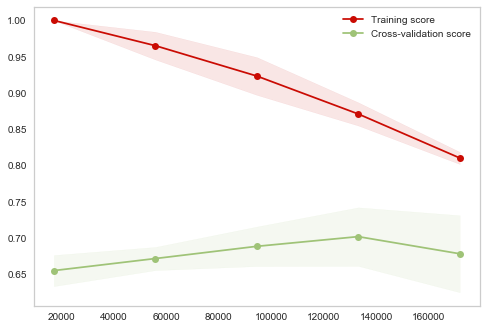

In [199]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_gini, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [200]:
#playing around with the pruning to get the best decision tree
#performing grid search to find the best type of SVM and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search, Kernel SVM to the Training set

from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini = DecisionTreeClassifier(criterion='gini',random_state = 0)
classifier_DF_gini.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]},
              {'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = classifier_DF_gini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.7871168948617863
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}


### Boosting

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_boost = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier_boost.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_boost = cross_val_score(estimator = classifier_boost, X = X_train, y = y_train, cv = 5,n_jobs=-1)
mean_DF_gini_boost=accuracies_boost.mean()
std_DF_gini_boost=accuracies_boost.std()

#after using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_gini_boost*100,end='\n')
print('standard deviation after cross validation:',mean_DF_gini_boost*100,end='\n')

# Predicting the Test set results
y_pred_boost = classifier_boost.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm_GBC_boost = confusion_matrix(y_test, y_pred_boost)
accu_GBC_boost=accuracy_score(y_test,y_pred_boost)
report_boost=classification_report(y_test,y_pred_boost)

# After using confusion matrix
print('The confusion matrix accuracy',cm_GBC_boost,end='\n')
print('The accuracy score',accu_GBC_boost*100,end='\n')
print('The classification report accuracy',report_boost,end='\n')

Mean of accuracies after cross validation: 72.06266866675838
standard deviation after cross validation: 72.06266866675838
The confusion matrix accuracy [[42444   740]
 [17373  3893]]
The accuracy score 71.89604344453065
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.71      0.98      0.82     43184
         1.0       0.84      0.18      0.30     21266

    accuracy                           0.72     64450
   macro avg       0.77      0.58      0.56     64450
weighted avg       0.75      0.72      0.65     64450



In [15]:
from sklearn.ensemble import AdaBoostClassifier
classifier_boost2 = AdaBoostClassifier(random_state=1)
classifier_boost2.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_boost2 = cross_val_score(estimator = classifier_boost2, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini_boost2=accuracies_boost2.mean()
std_DF_gini_boost2=accuracies_boost2.std()

#After using cross validation with 10 folds
print('Mean of accuracies after cross validation:',mean_DF_gini_boost2*100,end='\n')
print('standard deviation after cross validation:',std_DF_gini_boost2*100,end='\n')

# Predicting the Test set results
y_pred_boost2 = classifier_boost2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm_GBC_boost2 = confusion_matrix(y_test, y_pred_boost2)
accu_GBC_boost2=accuracy_score(y_test,y_pred_boost2)
report_boost2=classification_report(y_test,y_pred_boost2)


#After running the confusion matrix
print('The confusion matrix accuracy',cm_GBC_boost2,end='\n')
print('The accuracy score',accu_GBC_boost2*100,end='\n')
print('The classification report accuracy',report_boost2,end='\n')

Mean of accuracies after cross validation: 75.35359353529385
standard deviation after cross validation: 0.2683864732495322
The confusion matrix accuracy [[38169  5015]
 [10802 10464]]
The accuracy score 75.45849495733127
The classification report accuracy               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83     43184
         1.0       0.68      0.49      0.57     21266

    accuracy                           0.75     64450
   macro avg       0.73      0.69      0.70     64450
weighted avg       0.75      0.75      0.74     64450



<function matplotlib.pyplot.show(*args, **kw)>

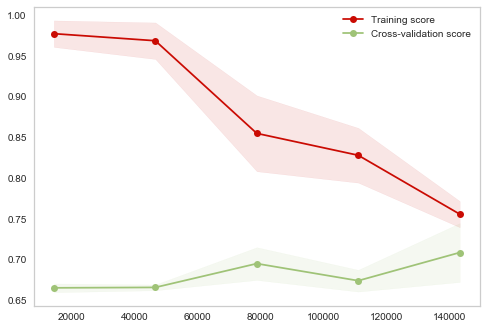

In [203]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_boost2, x1, y1,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [16]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [500,1000,2000,5000]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.7531569392817007
{'n_estimators': 500}
